layer1.weight torch.Size([64, 1])
layer1.bias torch.Size([64])
layer2.weight torch.Size([64, 64])
layer2.bias torch.Size([64])
layer3.weight torch.Size([1, 64])
layer3.bias torch.Size([1])


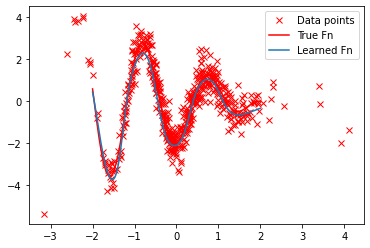

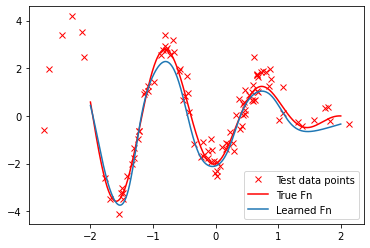

As we see above, our model that is blue graph is trained well through train data points and it also shows good-performance for test data points.


In [4]:
import torch
import numpy as np
from torch import nn, optim, FloatTensor
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

alpha = 0.1
K = 1000
B = 128
N = 512

def f_true(x) :
    return (x-2) * np.cos(x*4)

torch.manual_seed(0)
X_train = torch.normal(0.0, 1.0, (N,))
y_train = f_true( X_train ) + torch.normal(0, 0.5, X_train.shape )
X_val = torch.normal(0.0, 1.0, (N//5,))
y_val = f_true(X_val) + torch.normal(0, 0.5, X_val.shape )

train_dataloader = DataLoader(TensorDataset(
    X_train.unsqueeze(1), y_train.unsqueeze(1)), batch_size=B)

test_dataloader = DataLoader(TensorDataset(
    X_val.unsqueeze(1), y_val.unsqueeze(1)), batch_size=B)



class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.n0 = 1
        self.n1 = 64
        self.n2 = 64
        self.n3 = 1
        self.layer1 = nn.Linear(self.n0, self.n1, bias = True)
        self.layer2 = nn.Linear(self.n1, self.n2, bias=True)
        self.layer3 = nn.Linear(self.n2, self.n3, bias=True)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        temp = self.activation(self.layer1(x))
        temp = self.activation(self.layer2(temp))
        temp = self.layer3(temp)

        return temp


model = MLP()
model.layer1.weight.data = torch.normal(0, 1, model.layer1.weight.shape )
model.layer1.bias.data = torch.full( model.layer1.bias.shape, 0.03)

model.layer2.weight.data = torch.normal(0, 1, model.layer2.weight.shape )
model.layer2.bias.data = torch.full( model.layer2.bias.shape, 0.03)

model.layer3.weight.data = torch.normal(0, 1, model.layer3.weight.shape )
model.layer3.bias.data = torch.full( model.layer3.bias.shape, 0.03)

# To COUNT the number of PARAMETERS
for name, param in model.named_parameters():
    print(name, param.shape)

optimizer = optim.SGD( model.parameters(), lr = alpha )

loss_fn = nn.MSELoss()

for epoch in range(K):

    # TRAIN ON
    model.train()
    for x,y in train_dataloader:
        optimizer.zero_grad()
        loss = loss_fn( model(x), y.float() )
        loss.backward()
        optimizer.step()


model.train(mode=False)
with torch.no_grad():
    xx = torch.linspace(-2,2,1024).unsqueeze(1)
    plt.plot(X_train,y_train,'rx',label='Data points')
    plt.plot(xx, f_true(xx),'r',label='True Fn')
    plt.plot(xx, model(xx),label='Learned Fn')
plt.legend()
plt.show()

# For test_data
with torch.no_grad():
    xx = torch.linspace(-2,2,1024).unsqueeze(1)
    plt.plot(X_val,y_val,'rx',label='Test data points')
    plt.plot(xx, f_true(xx),'r',label='True Fn')
    plt.plot(xx, model(xx),label='Learned Fn')
plt.legend()
plt.show()

print("As we see above, our model that is blue graph is trained well through train data points and it also shows good-performance for test data points.")



In [5]:
print("the number of parameters can be calculated the formula : 64 + 64 + 64x64 + 64 + 64 + 1")
a = 64 + 64 + 64*64 + 64 + 64 + 1
print(f'The Number of Parameters : {a}')

the number of parameters can be calculated the formula : 64 + 64 + 64x64 + 64 + 64 + 1
The Number of Parameters : 4353
